In [1]:
import ROOT as RT
import numpy as np
from ROOT import TLatex
RT.enableJSVis()

Welcome to JupyROOT 6.12/07


In [2]:
import PyFunctions
from PyFunctions import *

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/lcg/root/6.12.07-gnimlf5/lib/ROOT.py:434: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


In [3]:
proof = RT.TProof.Open("lite://", "workers=12")

 +++ Starting PROOF-Lite with 12 workers +++
PROOF set to parallel mode (12 workers)


Opening connections to workers: OK (12 workers)                 
Setting up worker servers: OK (12 workers)                 


In [4]:
tree_mudata = RT.TChain('events')
tree_mudata.Add("~/nobackup/Jupyter/flatdimuontree_2017and2018_10percent_nosel.root")

tree_mubphi1 = RT.TChain('events')
tree_mubphi1.Add("~/nobackup/Jupyter/flat_dimuon_tree_BPhi_m0p5_ct1_flattree_vf.root")
tree_mubphi2 = RT.TChain('events')
tree_mubphi2.Add("~/nobackup/Jupyter/flat_dimuon_tree_BPhi_m2_ct10_flattree_vf.root")
tree_mubphi3 = RT.TChain('events')
tree_mubphi3.Add("~/nobackup/Jupyter/flat_dimuon_tree_BPhi_m4_ct100_flattree_vf.root")

tree_muhzd1 = RT.TChain('events')
tree_muhzd1.Add("~/nobackup/Jupyter/flat_dimuon_tree_HZdZd_m2_ct100_flattree_vf.root")
tree_muhzd2 = RT.TChain('events')
tree_muhzd2.Add("~/nobackup/Jupyter/flat_dimuon_tree_HZdZd_m8_ct10_flattree_vf.root")
tree_muhzd3 = RT.TChain('events')
tree_muhzd3.Add("~/nobackup/Jupyter/flat_dimuon_tree_HZdZd_m15_ct1_flattree_vf.root")

1

In [5]:
tree_muproofdata = RT.TProofChain(tree_mudata, True)

tree_muproofbphi1 = RT.TProofChain(tree_mubphi1, True)
tree_muproofbphi2 = RT.TProofChain(tree_mubphi2, True)
tree_muproofbphi3 = RT.TProofChain(tree_mubphi3, True)

tree_muproofhzd1 = RT.TProofChain(tree_muhzd1, True)
tree_muproofhzd2 = RT.TProofChain(tree_muhzd2, True)
tree_muproofhzd3 = RT.TProofChain(tree_muhzd3, True)

In [8]:
c1=RT.TCanvas('c1','c1',800,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 0.0 && lxy < 0.2 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.4, 0.4, 0.9, 0.9)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 10.1, "#font[12]{Preliminary}" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"0.0 cm < lxy < 0.2 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3zd (Potential memory leak).
Info in <TProofLite::SetQueryRunning>: starting query: 17
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up f

In [6]:
c1=RT.TCanvas('c1','c1',800,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 0.2 && lxy < 1.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.4, 0.4, 0.9, 0.9)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 10.1, "#font[12]{Preliminary}" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"0.2 cm < lxy < 1.0 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Info in <TProofLite::SetQueryRunning>: starting query: 1
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketizer>: Initial number of workers: 12
Validating files: OK (1 files)                 
[TProof::Progress] Total 214669705 events	|====================| 100.00 % [4838936.0 evts/s, 90.8 MB/s, time left: 0.0 s]
 Query processing time: 44.4 s
Info in <TProofDrawHist::SetDrawAtt>: att: 1000
Lite-0: all output objects have been merged                                                         
Info in <TProofLite::SetQueryRunning>: starting query: 2
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketizer>: Initial number of workers: 12
[TProof::Progress] Tot

In [7]:
c1=RT.TCanvas('c1','c1',800,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 1.0 && lxy < 11.0 && muon1_ntrklayers > 5 && muon2_ntrklayers > 5 && muon1_chi2overndof < 3 && muon2_chi2overndof < 3','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.4, 0.4, 0.9, 0.9)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 10.1, "#font[12]{Preliminary}" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"1.0 cm < lxy < 11.0 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3zd (Potential memory leak).
Info in <TProofLite::SetQueryRunning>: starting query: 9
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact lo

In [19]:
c1=RT.TCanvas('c1','c1',600,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 0.2 && lxy < 1.0','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 0.2 && lxy < 1.0','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 0.2 && lxy < 1.0','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 0.2 && lxy < 1.0','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 0.2 && lxy < 1.0','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 0.2 && lxy < 1.0','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 0.2 && lxy < 1.0','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 0.2 && lxy < 1.0','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.1, 0.1, 0.6, 0.6)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 1.1, "Preliminary" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"0.2 cm < lxy < 1.0 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3zd (Potential memory leak).
Info in <TProofLite::SetQueryRunning>: starting query: 105
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketiz

In [18]:
c1=RT.TCanvas('c1','c1',600,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 1.0 && lxy < 2.4','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 1.0 && lxy < 2.4','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 1.0 && lxy < 2.4','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 1.0 && lxy < 2.4','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 1.0 && lxy < 2.4','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 1.0 && lxy < 2.4','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 1.0 && lxy < 2.4','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 1.0 && lxy < 2.4','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.1, 0.1, 0.6, 0.6)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 1.1, "Preliminary" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"1.0 cm < lxy < 2.4 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3zd (Potential memory leak).
Info in <TProofLite::SetQueryRunning>: starting query: 97
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketize

In [17]:
c1=RT.TCanvas('c1','c1',600,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 2.4 && lxy < 3.1','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 2.4 && lxy < 3.1','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 2.4 && lxy < 3.1','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 2.4 && lxy < 3.1','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 2.4 && lxy < 3.1','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 2.4 && lxy < 3.1','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 2.4 && lxy < 3.1','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 2.4 && lxy < 3.1','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.1, 0.1, 0.6, 0.6)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 1.1, "Preliminary" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"2.4 cm < lxy < 3.1 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3zd (Potential memory leak).
Info in <TProofLite::SetQueryRunning>: starting query: 89
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketize

In [16]:
c1=RT.TCanvas('c1','c1',600,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 3.1 && lxy < 7.0','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 3.1 && lxy < 7.0','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 3.1 && lxy < 7.0','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 3.1 && lxy < 7.0','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 3.1 && lxy < 7.0','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 3.1 && lxy < 7.0','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 3.1 && lxy < 7.0','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 3.1 && lxy < 7.0','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.1, 0.1, 0.6, 0.6)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 1.1, "Preliminary" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"3.1 cm < lxy < 7.0 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3zd (Potential memory leak).
Info in <TProofLite::SetQueryRunning>: starting query: 81
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketize

In [8]:
c1=RT.TCanvas('c1','c1',600,600)

h0 = RT.TH1F("h0","",100,0,10)
h1 = RT.TH1F("h1","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h2b = RT.TH1F("h2b","",100,0,10)
h3b = RT.TH1F("h3b","",100,0,10)

h1zd = RT.TH1F("h1zd","",100,0,10)
h2zd = RT.TH1F("h2zd","",100,0,10)
h3zd = RT.TH1F("h3zd","",100,0,10)

tree_muproofdata.Draw('muon2_trkiso>>h0','dimuon_mass < 5 && lxy > 7.0 && lxy < 11.0','')
tree_muproofdata.Draw('muon2_trkiso>>h1','dimuon_mass > 5 && lxy > 7.0 && lxy < 11.0','')

tree_muproofbphi1.Draw('muon2_trkiso>>h1b','lxy > 7.0 && lxy < 11.0','')
tree_muproofbphi2.Draw('muon2_trkiso>>h2b','lxy > 7.0 && lxy < 11.0','')
tree_muproofbphi3.Draw('muon2_trkiso>>h3b','lxy > 7.0 && lxy < 11.0','')

tree_muproofhzd1.Draw('muon2_trkiso>>h1zd','lxy > 7.0 && lxy < 11.0','')
tree_muproofhzd2.Draw('muon2_trkiso>>h2zd','lxy > 7.0 && lxy < 11.0','')
tree_muproofhzd3.Draw('muon2_trkiso>>h3zd','lxy > 7.0 && lxy < 11.0','')

h0.Scale(1/h0.Integral())
h1.Scale(1/h1.Integral())

h1b.Scale(1/h1b.Integral())
h2b.Scale(1/h2b.Integral())
h3b.Scale(1/h3b.Integral())

h1zd.Scale(1/h1zd.Integral())
h2zd.Scale(1/h2zd.Integral())
h3zd.Scale(1/h3zd.Integral())

# h0.SetLineColor(1)
# h1.SetLineColor(4)

# h1b.SetLineColor(91)
# h2b.SetLineColor(94)
# h3b.SetLineColor(98)

# h1zd.SetLineColor(71)
# h2zd.SetLineColor(61)
# h3zd.SetLineColor(51)




# h0.SetTitle("0 cm < lxy < 11 cm")
# RT.gStyle.SetTitleX(0.3)
# RT.gStyle.SetTitleY(0.9)
# RT.gStyle.SetTitleW(0.3)
# #RT.gStyle.SetTitleH(0.2)
# RT.gStyle.SetTitleTextColor(8)




h0.GetYaxis().SetRangeUser(0.01,1)
h0.GetXaxis().SetRangeUser(0,1)
h0.GetYaxis().SetTitle("Fraction of Events")
h0.GetXaxis().SetTitle("Track Isolation")
h0.GetYaxis().SetTitleOffset(1.5)
RT.gStyle.SetLabelColor(1)



GoodPlotFormat(h0, "markers", RT.kBlack, 20)
GoodPlotFormat(h1, "markers", RT.kBlue, 20)

GoodPlotFormat(h1b, "thickline", 91, 2)
GoodPlotFormat(h2b, "thickline", 94, 2)
GoodPlotFormat(h3b, "thickline", 98, 2)

GoodPlotFormat(h1zd, "thickline", 71, 2)
GoodPlotFormat(h2zd, "thickline", 65, 2)
GoodPlotFormat(h3zd, "thickline", 51, 2)


h0.Draw("E1")
h1.Draw("E1 SAME")

h1b.Draw("HIST SAME")
h2b.Draw("HIST SAME")
h3b.Draw("HIST SAME")

h1zd.Draw("HIST SAME")
h2zd.Draw("HIST SAME")
h3zd.Draw("HIST SAME")


legend = RT.TLegend(0.1, 0.1, 0.6, 0.6)  
legend.SetBorderSize(0)                                                                                                                                                              
legend.SetFillColorAlpha(0,0)                                                                                                                                                               
legend.SetTextSize(0.03) 
# legend.SetHeader("0 cm < lxy < 11 cm")
legend.AddEntry(h0 , "Data(< 5 GeV)", "lpe")                                                                                                           
legend.AddEntry(h1, "Data(> 5 GeV)", "lpe") 

legend.AddEntry(h1b , "B->Phi(mass = 0.5 GeV, ctau = 1 mm)", "F")
legend.AddEntry(h2b , "B->Phi(mass = 2 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3b , "B->Phi(mass = 4 GeV, ctau = 100 mm)", "F")                                                                                                           

legend.AddEntry(h1zd , "H->ZdZd(mass = 2 GeV, ctau = 100 mm)", "F")
legend.AddEntry(h2zd , "H->ZdZd(mass = 8 GeV, ctau = 10 mm)", "F")                                                                                                           
legend.AddEntry(h3zd , "H->ZdZd(mass = 15 GeV, ctau = 1 mm)", "F")                                                                                                           

legend.SetTextFont(22)
legend.Draw()


AddCMSLumi(c1, 1.1, "Preliminary" )
c1.Draw()

l=RT.TLine(0.1,c1.GetUymin(),0.1,c1.GetUymax())
l.SetLineColor(2)
l.SetLineWidth(2)
l.SetLineStyle(2)
l.Draw()
a = RT.TArrow(0.1,3*c1.GetUymax()/4.0,0.0,3*c1.GetUymax()/4.0)
a.SetLineColor(2)
a.Draw()


t = RT.TText(0.45,0.93,"7.0 cm < lxy < 11.0 cm")
t.SetTextAlign(22)
t.SetTextColor(8)
t.SetTextFont(42)
t.SetTextSize(20)
t.SetTextAngle(0)
t.SetNDC(1)
t.Draw()
#c1.SetLogy()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2zd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3zd (Potential memory leak).
Info in <TProofLite::SetQueryRunning>: starting query: 17
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketize

24847521.0
0.362777679109
0.26739774161
0.369824579281
1640687.0
0.370627669994
0.361428474779
0.267943855226
4197.0
0.710507505361
0.12151536812
0.167977126519
3402.0
0.817754262199
0.12962962963
0.0526161081717
1554.0
0.880952380952
0.0984555984556
0.020592020592
4144.0
0.930260617761
0.0513996138996
0.0183397683398
7055.0
0.964705882353
0.0326009922041
0.00269312544295
(0.00014105589851249752, 0.00011678681075846506, 0.00017253267293315073)
(0.0005564367414962836, 0.0005476407151546262, 0.0005715102584177608)


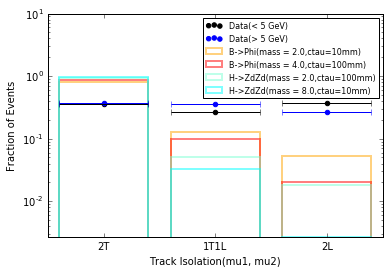

Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h0tight (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h0medium (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h0loose (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1tight (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1medium (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1loose (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1btight (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1bmedium (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1bloose (Potential me

In [17]:

h0 = RT.TH1F("h0","",100,0,10)
h0tight = RT.TH1F("h0tight","",100,0,10)
h0medium = RT.TH1F("h0medium","",100,0,10)
h0loose = RT.TH1F("h0loose","",100,0,10)

h1 = RT.TH1F("h1","",100,0,10)
h1tight = RT.TH1F("h1tight","",100,0,10)
h1medium = RT.TH1F("h1medium","",100,0,10)
h1loose = RT.TH1F("h1loose","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h1btight = RT.TH1F("h1btight","",100,0,10)
h1bmedium = RT.TH1F("h1bmedium","",100,0,10)
h1bloose = RT.TH1F("h1bloose","",100,0,10)


h2b = RT.TH1F("h2b","",100,0,10)
h2btight = RT.TH1F("h2btight","",100,0,10)
h2bmedium = RT.TH1F("h2bmedium","",100,0,10)
h2bloose = RT.TH1F("h2bloose","",100,0,10)

h3b = RT.TH1F("h3b","",100,0,10)
h3btight = RT.TH1F("h3btight","",100,0,10)
h3bmedium = RT.TH1F("h3bmedium","",100,0,10)
h3bloose = RT.TH1F("h3bloose","",100,0,10)


h1zd = RT.TH1F("h1zd","",100,0,10)
h1zdtight = RT.TH1F("h1zdtight","",100,0,10)
h1zdmedium = RT.TH1F("h1zdmedium","",100,0,10)
h1zdloose = RT.TH1F("h1zdloose","",100,0,10)

h2zd = RT.TH1F("h2zd","",100,0,10)
h2zdtight = RT.TH1F("h2zdtight","",100,0,10)
h2zdmedium = RT.TH1F("h2zdmedium","",100,0,10)
h2zdloose = RT.TH1F("h2zdloose","",100,0,10)

tree_muproofdata.Draw('dimuon_mass>>h0','dimuon_mass < 5','')
tree_muproofdata.Draw('dimuon_mass>>h0tight','dimuon_mass < 5 && muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofdata.Draw('dimuon_mass>>h0medium','dimuon_mass < 5 && ((muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1))','')
tree_muproofdata.Draw('dimuon_mass>>h0loose','dimuon_mass < 5 && muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofdata.Draw('dimuon_mass>>h1','dimuon_mass > 5','')
tree_muproofdata.Draw('dimuon_mass>>h1tight','dimuon_mass > 5 && muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofdata.Draw('dimuon_mass>>h1medium','dimuon_mass > 5 && ((muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1))','')
tree_muproofdata.Draw('dimuon_mass>>h1loose','dimuon_mass > 5 && muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')


tree_muproofbphi1.Draw('dimuon_mass>>h1b','','')
tree_muproofbphi1.Draw('dimuon_mass>>h1btight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi1.Draw('dimuon_mass>>h1bmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofbphi1.Draw('dimuon_mass>>h1bloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')


tree_muproofbphi2.Draw('dimuon_mass>>h2b','','')
tree_muproofbphi2.Draw('dimuon_mass>>h2btight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi2.Draw('dimuon_mass>>h2bmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofbphi2.Draw('dimuon_mass>>h2bloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofbphi3.Draw('dimuon_mass>>h3b','','')
tree_muproofbphi3.Draw('dimuon_mass>>h3btight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi3.Draw('dimuon_mass>>h3bmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofbphi3.Draw('dimuon_mass>>h3bloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofhzd1.Draw('dimuon_mass>>h1zd','','')
tree_muproofhzd1.Draw('dimuon_mass>>h1zdtight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofhzd1.Draw('dimuon_mass>>h1zdmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofhzd1.Draw('dimuon_mass>>h1zdloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofhzd2.Draw('dimuon_mass>>h2zd','','')
tree_muproofhzd2.Draw('dimuon_mass>>h2zdtight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofhzd2.Draw('dimuon_mass>>h2zdmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofhzd2.Draw('dimuon_mass>>h2zdloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')



print h0.Integral()
print h0tight.Integral()/h0.Integral()
print h0medium.Integral()/h0.Integral()
print h0loose.Integral()/h0.Integral()

print h1.Integral()
print h1tight.Integral()/h1.Integral()
print h1medium.Integral()/h1.Integral()
print h1loose.Integral()/h1.Integral()


print h1b.Integral()
print h1btight.Integral()/h1b.Integral()
print h1bmedium.Integral()/h1b.Integral()
print h1bloose.Integral()/h1b.Integral()


print h2b.Integral()
print h2btight.Integral()/h2b.Integral()
print h2bmedium.Integral()/h2b.Integral()
print h2bloose.Integral()/h2b.Integral()

print h3b.Integral()
print h3btight.Integral()/h3b.Integral()
print h3bmedium.Integral()/h3b.Integral()
print h3bloose.Integral()/h3b.Integral()

print h1zd.Integral()
print h1zdtight.Integral()/h1zd.Integral()
print h1zdmedium.Integral()/h1zd.Integral()
print h1zdloose.Integral()/h1zd.Integral()

print h2zd.Integral()
print h2zdtight.Integral()/h2zd.Integral()
print h2zdmedium.Integral()/h2zd.Integral()
print h2zdloose.Integral()/h2zd.Integral()

from array import array

#x = ("2T", "1T1L", "2L")
x = (1,2,3)
xlabel = ("2T", "1T1L", "2L")

d0 = (h0tight.Integral()/h0.Integral(), h0medium.Integral()/h0.Integral(), h0loose.Integral()/h0.Integral())
d0err = (d0[0]*np.sqrt(1/h0tight.Integral() + 1/h0.Integral()), d0[1]*np.sqrt(1/h0medium.Integral() + 1/h0.Integral()), d0[2]*np.sqrt(1/h0loose.Integral() + 1/h0loose.Integral()))
print d0err

d1 = (h1tight.Integral()/h1.Integral(), h1medium.Integral()/h1.Integral(), h1loose.Integral()/h1.Integral())
d1err = (d1[0]*np.sqrt(1/h1tight.Integral() + 1/h1.Integral()), d1[1]*np.sqrt(1/h1medium.Integral() + 1/h1.Integral()), d1[2]*np.sqrt(1/h1loose.Integral() + 1/h1loose.Integral()))
print d1err

b1 = array("d")
b1 = (h1btight.Integral()/h1b.Integral(), h1bmedium.Integral()/h1b.Integral(), h1bloose.Integral()/h1b.Integral())

b2 = array("d")
b2 = (h2btight.Integral()/h2b.Integral(), h2bmedium.Integral()/h2b.Integral(), h2bloose.Integral()/h2b.Integral())

b3 = array("d")
b3 = (h3btight.Integral()/h3b.Integral(), h3bmedium.Integral()/h3b.Integral(), h3bloose.Integral()/h3b.Integral())

zd1 = (h1zdtight.Integral()/h1zd.Integral(), h1zdmedium.Integral()/h1zd.Integral(), h1zdloose.Integral()/h1zd.Integral())
zd2 = (h2zdtight.Integral()/h2zd.Integral(), h2zdmedium.Integral()/h2zd.Integral(), h2zdloose.Integral()/h2zd.Integral())


import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.colors import LogNorm

from matplotlib import pyplot as plt
plt.scatter(x,d0, color = 'black', label="Data(< 5 GeV)")
plt.errorbar(x,d0,yerr=d0err,xerr=0.4,color = 'black', linestyle="None")
plt.scatter(x,d1, color = 'blue', label="Data(> 5 GeV)")
plt.errorbar(x,d1,yerr=d1err,xerr=0.4,color = 'blue', linestyle="None")
#plt.bar(x,b1,align='center',fill=False,color='yellow',alpha=0.5,linewidth=2,edgecolor='yellow', label="B->Phi(mass = 0.5,ctau=1mm)")
plt.bar(x,b2,align='center',fill=False,color='orange',alpha=0.5,linewidth=2,edgecolor='orange', label="B->Phi(mass = 2.0,ctau=10mm)")
plt.bar(x,b3,align='center',fill=False,color='red',alpha=0.5,linewidth=2,edgecolor='red', label="B->Phi(mass = 4.0,ctau=100mm)")

plt.bar(x,zd1,align='center',fill=False,color='aquamarine',alpha=0.5,linewidth=2,edgecolor='aquamarine', label="H->ZdZd(mass = 2.0,ctau=100mm)")
plt.bar(x,zd2,align='center',fill=False,color='aqua',alpha=0.5,linewidth=2,edgecolor='aqua', label="H->ZdZd(mass = 8.0,ctau=10mm)")


plt.xticks(x, xlabel)
#plt.ylim(0,1.5)
plt.xlim(0.5,3.5)
plt.xlabel("Track Isolation(mu1, mu2)")
plt.ylabel("Fraction of Events")
plt.legend(fontsize=8)
plt.yscale("log")
plt.ylim(0,10)
#plt.text(2.5, 1.6, "1.1 fb-1", fontsize=12)
plt.show()
plt.savefig("trkisolationfrac.png")



In [ ]:

h0 = RT.TH1F("h0","",100,0,10)
h0tight = RT.TH1F("h0tight","",100,0,10)
h0medium = RT.TH1F("h0medium","",100,0,10)
h0loose = RT.TH1F("h0loose","",100,0,10)

h1 = RT.TH1F("h1","",100,0,10)
h1tight = RT.TH1F("h1tight","",100,0,10)
h1medium = RT.TH1F("h1medium","",100,0,10)
h1loose = RT.TH1F("h1loose","",100,0,10)

h1b = RT.TH1F("h1b","",100,0,10)
h1btight = RT.TH1F("h1btight","",100,0,10)
h1bmedium = RT.TH1F("h1bmedium","",100,0,10)
h1bloose = RT.TH1F("h1bloose","",100,0,10)


h2b = RT.TH1F("h2b","",100,0,10)
h2btight = RT.TH1F("h2btight","",100,0,10)
h2bmedium = RT.TH1F("h2bmedium","",100,0,10)
h2bloose = RT.TH1F("h2bloose","",100,0,10)

h3b = RT.TH1F("h3b","",100,0,10)
h3btight = RT.TH1F("h3btight","",100,0,10)
h3bmedium = RT.TH1F("h3bmedium","",100,0,10)
h3bloose = RT.TH1F("h3bloose","",100,0,10)


h1zd = RT.TH1F("h1zd","",100,0,10)
h1zdtight = RT.TH1F("h1zdtight","",100,0,10)
h1zdmedium = RT.TH1F("h1zdmedium","",100,0,10)
h1zdloose = RT.TH1F("h1zdloose","",100,0,10)

h2zd = RT.TH1F("h2zd","",100,0,10)
h2zdtight = RT.TH1F("h2zdtight","",100,0,10)
h2zdmedium = RT.TH1F("h2zdmedium","",100,0,10)
h2zdloose = RT.TH1F("h2zdloose","",100,0,10)

tree_muproofdata.Draw('dimuon_mass>>h0','dimuon_mass < 5','')
tree_muproofdata.Draw('dimuon_mass>>h0tight','dimuon_mass < 5 && dRmuon1jet < 0.1 && muon2_trkiso < 0.1','')
tree_muproofdata.Draw('dimuon_mass>>h0medium','dimuon_mass < 5 && ((muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1))','')
tree_muproofdata.Draw('dimuon_mass>>h0loose','dimuon_mass < 5 && muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofdata.Draw('dimuon_mass>>h1','dimuon_mass > 5','')
tree_muproofdata.Draw('dimuon_mass>>h1tight','dimuon_mass > 5 && muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofdata.Draw('dimuon_mass>>h1medium','dimuon_mass > 5 && ((muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1))','')
tree_muproofdata.Draw('dimuon_mass>>h1loose','dimuon_mass > 5 && muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')


tree_muproofbphi1.Draw('dimuon_mass>>h1b','','')
tree_muproofbphi1.Draw('dimuon_mass>>h1btight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi1.Draw('dimuon_mass>>h1bmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofbphi1.Draw('dimuon_mass>>h1bloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')


tree_muproofbphi2.Draw('dimuon_mass>>h2b','muon2_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi2.Draw('dimuon_mass>>h2btight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi2.Draw('dimuon_mass>>h2bmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofbphi2.Draw('dimuon_mass>>h2bloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofbphi3.Draw('dimuon_mass>>h3b','muon2_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi3.Draw('dimuon_mass>>h3btight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofbphi3.Draw('dimuon_mass>>h3bmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofbphi3.Draw('dimuon_mass>>h3bloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofhzd1.Draw('dimuon_mass>>h1zd','','')
tree_muproofhzd1.Draw('dimuon_mass>>h1zdtight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofhzd1.Draw('dimuon_mass>>h1zdmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofhzd1.Draw('dimuon_mass>>h1zdloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')

tree_muproofhzd2.Draw('dimuon_mass>>h2zd','','')
tree_muproofhzd2.Draw('dimuon_mass>>h2zdtight','muon1_trkiso < 0.1 && muon2_trkiso < 0.1','')
tree_muproofhzd2.Draw('dimuon_mass>>h2zdmedium','(muon1_trkiso < 0.1 && muon2_trkiso > 0.1) || (muon1_trkiso > 0.1 && muon2_trkiso < 0.1)','')
tree_muproofhzd2.Draw('dimuon_mass>>h2zdloose',' muon1_trkiso > 0.1 && muon2_trkiso > 0.1','')



print h0.Integral()
print h0tight.Integral()/h0.Integral()
print h0medium.Integral()/h0.Integral()
print h0loose.Integral()/h0.Integral()

print h1.Integral()
print h1tight.Integral()/h1.Integral()
print h1medium.Integral()/h1.Integral()
print h1loose.Integral()/h1.Integral()


print h1b.Integral()
print h1btight.Integral()/h1b.Integral()
print h1bmedium.Integral()/h1b.Integral()
print h1bloose.Integral()/h1b.Integral()


print h2b.Integral()
print h2btight.Integral()/h2b.Integral()
print h2bmedium.Integral()/h2b.Integral()
print h2bloose.Integral()/h2b.Integral()

print h3b.Integral()
print h3btight.Integral()/h3b.Integral()
print h3bmedium.Integral()/h3b.Integral()
print h3bloose.Integral()/h3b.Integral()

print h1zd.Integral()
print h1zdtight.Integral()/h1zd.Integral()
print h1zdmedium.Integral()/h1zd.Integral()
print h1zdloose.Integral()/h1zd.Integral()

print h2zd.Integral()
print h2zdtight.Integral()/h2zd.Integral()
print h2zdmedium.Integral()/h2zd.Integral()
print h2zdloose.Integral()/h2zd.Integral()

from array import array

#x = ("2T", "1T1L", "2L")
x = (1,2,3)
xlabel = ("2T", "1T1L", "2L")

d0 = (h0tight.Integral()/h0.Integral(), h0medium.Integral()/h0.Integral(), h0loose.Integral()/h0.Integral())
d0err = (d0[0]*np.sqrt(1/h0tight.Integral() + 1/h0.Integral()), d0[1]*np.sqrt(1/h0medium.Integral() + 1/h0.Integral()), d0[2]*np.sqrt(1/h0loose.Integral() + 1/h0loose.Integral()))
print d0err

d1 = (h1tight.Integral()/h1.Integral(), h1medium.Integral()/h1.Integral(), h1loose.Integral()/h1.Integral())
d1err = (d1[0]*np.sqrt(1/h1tight.Integral() + 1/h1.Integral()), d1[1]*np.sqrt(1/h1medium.Integral() + 1/h1.Integral()), d1[2]*np.sqrt(1/h1loose.Integral() + 1/h1loose.Integral()))
print d1err

b1 = array("d")
b1 = (h1btight.Integral()/h1b.Integral(), h1bmedium.Integral()/h1b.Integral(), h1bloose.Integral()/h1b.Integral())

b2 = array("d")
b2 = (h2btight.Integral()/h2b.Integral(), h2bmedium.Integral()/h2b.Integral(), h2bloose.Integral()/h2b.Integral())

b3 = array("d")
b3 = (h3btight.Integral()/h3b.Integral(), h3bmedium.Integral()/h3b.Integral(), h3bloose.Integral()/h3b.Integral())

zd1 = (h1zdtight.Integral()/h1zd.Integral(), h1zdmedium.Integral()/h1zd.Integral(), h1zdloose.Integral()/h1zd.Integral())

import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.colors import LogNorm

from matplotlib import pyplot as plt
plt.scatter(x,d0, color = 'black', label="Data(< 5 GeV)")
plt.errorbar(x,d0,yerr=d0err,xerr=0.4,color = 'black', linestyle="None")
plt.scatter(x,d1, color = 'blue', label="Data(> 5 GeV)")
plt.errorbar(x,d1,yerr=d1err,xerr=0.4,color = 'blue', linestyle="None")
#plt.bar(x,b1,align='center',fill=False,color='yellow',alpha=0.5,linewidth=2,edgecolor='yellow', label="B->Phi(mass = 0.5,ctau=1mm)")
plt.bar(x,b2,align='center',fill=False,color='orange',alpha=0.5,linewidth=2,edgecolor='orange', label="B->Phi(mass = 2.0,ctau=10mm)")
plt.bar(x,b3,align='center',fill=False,color='red',alpha=0.5,linewidth=2,edgecolor='red', label="B->Phi(mass = 4.0,ctau=100mm)")

plt.bar(x,zd1,align='center',fill=False,color='aquamarine',alpha=0.5,linewidth=2,edgecolor='aquamarine', label="H->ZdZd(mass = 2.0,ctau=100mm)")
plt.bar(x,zd1,align='center',fill=False,color='aqua',alpha=0.5,linewidth=2,edgecolor='aqua', label="H->ZdZd(mass = 8.0,ctau=10mm)")


plt.xticks(x, xlabel)
plt.ylim(0,1.5)
plt.xlim(0.5,3.5)
plt.xlabel("Track Isolation(mu1, mu2)")
plt.ylabel("Fraction of Events")
plt.legend(fontsize=8)
#plt.text(2.5, 1.6, "1.1 fb-1", fontsize=12)
plt.show()
plt.savefig("trkisolationfrac.png")

